<a href="https://colab.research.google.com/github/RiskSpecialist/CIND820_TorontoCrime/blob/main/CIND820_TorontoCrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import zipfile
import io
import requests

In [4]:
# URLs to the homicide and non-homicide data
homicide_url = 'https://raw.githubusercontent.com/RiskSpecialist/CIND820_TorontoCrime/main/Homicides_Open_Data_ASR_RC_TBL_002_4450242736547431910.csv'
non_homicide_zip_url = 'https://raw.githubusercontent.com/RiskSpecialist/CIND820_TorontoCrime/main/Major_Crime_Indicators_Open_Data_6927126107499016617.zip'

In [5]:
# Load homicide data
homicide_data = pd.read_csv(homicide_url)

In [6]:
# Download the zip file
response = requests.get(non_homicide_zip_url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extract the .csv file inside the zip and load it into pandas

with zip_file.open('Major_Crime_Indicators_Open_Data_6927126107499016617.csv') as file:
    non_homicide_data = pd.read_csv(file)

In [7]:
# Preview both datasets
print("Homicide Data Sample:\n", homicide_data.head())
print("\nNon-Homicide Data Sample:\n", non_homicide_data.head())


Homicide Data Sample:
    OBJECTID EVENT_UNIQUE_ID              OCC_DATE  OCC_YEAR OCC_MONTH  \
0         1   GO-2004111878   1/3/2004 5:00:00 AM      2004   January   
1         2   GO-2004125755   1/8/2004 5:00:00 AM      2004   January   
2         3   GO-2004136086   1/8/2004 5:00:00 AM      2004   January   
3         4   GO-2004148623  1/25/2004 5:00:00 AM      2004   January   
4         5   GO-2004148619  1/25/2004 5:00:00 AM      2004   January   

   OCC_DAY   OCC_DOW  OCC_DOY DIVISION HOMICIDE_TYPE HOOD_158  \
0        3  Saturday        3      D53         Other      098   
1        8  Thursday        8      D42      Shooting      142   
2        8  Thursday        8      D42      Shooting      146   
3       25    Sunday       25      D13      Shooting      171   
4       25    Sunday       25      D42      Shooting      144   

                NEIGHBOURHOOD_158 HOOD_140  \
0        Rosedale-Moore Park (98)      098   
1              Woburn North (142)      137   
2        

In [8]:
# Shape of each dataset
print("Homicide Data Shape:", homicide_data.shape)
print("Non-Homicide Data Shape:", non_homicide_data.shape)



Homicide Data Shape: (1440, 18)
Non-Homicide Data Shape: (396735, 31)


In [9]:
# Display info for Homicide Data
print("Homicide Data Info:")
homicide_data.info()

# Display info for Non-Homicide Data
print("\nNon-Homicide Data Info:")
non_homicide_data.info()

Homicide Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           1440 non-null   int64  
 1   EVENT_UNIQUE_ID    1440 non-null   object 
 2   OCC_DATE           1440 non-null   object 
 3   OCC_YEAR           1440 non-null   int64  
 4   OCC_MONTH          1440 non-null   object 
 5   OCC_DAY            1440 non-null   int64  
 6   OCC_DOW            1440 non-null   object 
 7   OCC_DOY            1440 non-null   int64  
 8   DIVISION           1440 non-null   object 
 9   HOMICIDE_TYPE      1440 non-null   object 
 10  HOOD_158           1440 non-null   object 
 11  NEIGHBOURHOOD_158  1440 non-null   object 
 12  HOOD_140           1440 non-null   object 
 13  NEIGHBOURHOOD_140  1440 non-null   object 
 14  LONG_WGS84         1440 non-null   float64
 15  LAT_WGS84          1440 non-null   float64
 16  x   

In [10]:
# Count missing values in each dataset
print("\nHomicide Data Missing Values:\n", homicide_data.isnull().sum())
print("\nNon-Homicide Data Missing Values:\n", non_homicide_data.isnull().sum())


Homicide Data Missing Values:
 OBJECTID             0
EVENT_UNIQUE_ID      0
OCC_DATE             0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOW              0
OCC_DOY              0
DIVISION             0
HOMICIDE_TYPE        0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
x                    0
y                    0
dtype: int64

Non-Homicide Data Missing Values:
 OBJECTID               0
EVENT_UNIQUE_ID        0
REPORT_DATE            0
OCC_DATE               0
REPORT_YEAR            0
REPORT_MONTH           0
REPORT_DAY             0
REPORT_DOY             0
REPORT_DOW             0
REPORT_HOUR            0
OCC_YEAR             130
OCC_MONTH            130
OCC_DAY              130
OCC_DOY              130
OCC_DOW              130
OCC_HOUR               0
DIVISION               0
LOCATION_TYPE          0
PREMISES_TYPE          0
UCR_CODE               0
UCR_E

In [11]:
# Drop rows with missing values in both datasets
homicide_data = homicide_data.dropna()
non_homicide_data = non_homicide_data.dropna()

In [12]:
# Convert date columns in homicide data from object type to datetime format
homicide_data['OCC_DATE'] = pd.to_datetime(homicide_data['OCC_DATE'], errors='coerce')

# Convert date columns in non-homicide data from object type to datetime format
non_homicide_data['REPORT_DATE'] = pd.to_datetime(non_homicide_data['REPORT_DATE'], errors='coerce')
non_homicide_data['OCC_DATE'] = pd.to_datetime(non_homicide_data['OCC_DATE'], errors='coerce')

In [13]:
# Verify homicide data after cleaning, let’s display basic information to confirm the data types and check for remaining missing values
print("Homicide Data Info After Cleaning:")
print(homicide_data.info())
print("\nSample of Homicide Data:")
print(homicide_data.head())

# Verify non-homicide data after cleaning, let’s display basic information to confirm the data types and check for remaining missing values
print("Non-Homicide Data Info After Cleaning:")
print(non_homicide_data.info())
print("\nSample of Non-Homicide Data:")
print(non_homicide_data.head())

Homicide Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OBJECTID           1440 non-null   int64         
 1   EVENT_UNIQUE_ID    1440 non-null   object        
 2   OCC_DATE           1440 non-null   datetime64[ns]
 3   OCC_YEAR           1440 non-null   int64         
 4   OCC_MONTH          1440 non-null   object        
 5   OCC_DAY            1440 non-null   int64         
 6   OCC_DOW            1440 non-null   object        
 7   OCC_DOY            1440 non-null   int64         
 8   DIVISION           1440 non-null   object        
 9   HOMICIDE_TYPE      1440 non-null   object        
 10  HOOD_158           1440 non-null   object        
 11  NEIGHBOURHOOD_158  1440 non-null   object        
 12  HOOD_140           1440 non-null   object        
 13  NEIGHBOURHOOD_140  1440 non-

In [14]:
# Check for duplicates in both datasets
duplicate_homicide_rows = homicide_data.duplicated().sum()
duplicate_non_homicide_rows = non_homicide_data.duplicated().sum()

print(f"Duplicate rows in Homicide Data: {duplicate_homicide_rows}")
print(f"Duplicate rows in Non-Homicide Data: {duplicate_non_homicide_rows}")

# Verify date parts for homicide_data
homicide_data['year_check'] = homicide_data['OCC_DATE'].dt.year == homicide_data['OCC_YEAR']
homicide_data['month_check'] = homicide_data['OCC_DATE'].dt.month_name() == homicide_data['OCC_MONTH']
homicide_data['day_check'] = homicide_data['OCC_DATE'].dt.day == homicide_data['OCC_DAY']

# Check if any mismatches are found
homicide_date_mismatches = homicide_data[~(homicide_data['year_check'] & homicide_data['month_check'] & homicide_data['day_check'])]
print(f"Homicide Date Mismatches: {len(homicide_date_mismatches)}")

# Verify date parts for non_homicide_data similarly
non_homicide_data['year_check'] = non_homicide_data['OCC_DATE'].dt.year == non_homicide_data['OCC_YEAR']
non_homicide_data['month_check'] = non_homicide_data['OCC_DATE'].dt.month_name() == non_homicide_data['OCC_MONTH']
non_homicide_data['day_check'] = non_homicide_data['OCC_DATE'].dt.day == non_homicide_data['OCC_DAY']

# Check if any mismatches are found
non_homicide_date_mismatches = non_homicide_data[~(non_homicide_data['year_check'] & non_homicide_data['month_check'] & non_homicide_data['day_check'])]
print(f"Non-Homicide Date Mismatches: {len(non_homicide_date_mismatches)}")

Duplicate rows in Homicide Data: 0
Duplicate rows in Non-Homicide Data: 0
Homicide Date Mismatches: 0
Non-Homicide Date Mismatches: 0


In [15]:
# Drop unnecessary columns
non_homicide_data = non_homicide_data.drop(columns=['year_check', 'month_check', 'day_check'])
homicide_data = homicide_data.drop(columns=['year_check', 'month_check', 'day_check'])


# Convert some of the float64 columns to int64
non_homicide_data['OCC_YEAR'] = non_homicide_data['OCC_YEAR'].astype('int64')
non_homicide_data['OCC_DAY'] = non_homicide_data['OCC_DAY'].astype('int64')
non_homicide_data['OCC_DOY'] = non_homicide_data['OCC_DOY'].astype('int64')
homicide_data['OCC_YEAR'] = homicide_data['OCC_YEAR'].astype('int64')
homicide_data['OCC_DAY'] = homicide_data['OCC_DAY'].astype('int64')
homicide_data['OCC_DOY'] = homicide_data['OCC_DOY'].astype('int64')

In [16]:
# Remove rows where longitude or latitude are zero in the homicide dataset
homicide_data = homicide_data[(homicide_data['LONG_WGS84'] != 0) & (homicide_data['LAT_WGS84'] != 0)]

# Remove rows where longitude or latitude are zero in the non-homicide dataset
non_homicide_data = non_homicide_data[(non_homicide_data['LONG_WGS84'] != 0) & (non_homicide_data['LAT_WGS84'] != 0)]

# Display the shape of the updated datasets
print("Homicide Data - Updated Shape:", homicide_data.shape)
print("Non-Homicide Data - Updated Shape:", non_homicide_data.shape)

Homicide Data - Updated Shape: (1440, 18)
Non-Homicide Data - Updated Shape: (390636, 31)


In [17]:
# Check for NSA values in the specified columns for both datasets
nsa_counts_homicide = {
    'HOOD_158': (homicide_data['HOOD_158'] == 'NSA').sum(),
    'NEIGHBOURHOOD_158': (homicide_data['NEIGHBOURHOOD_158'] == 'NSA').sum(),
    'HOOD_140': (homicide_data['HOOD_140'] == 'NSA').sum(),
    'NEIGHBOURHOOD_140': (homicide_data['NEIGHBOURHOOD_140'] == 'NSA').sum(),
}

nsa_counts_non_homicide = {
    'HOOD_158': (non_homicide_data['HOOD_158'] == 'NSA').sum(),
    'NEIGHBOURHOOD_158': (non_homicide_data['NEIGHBOURHOOD_158'] == 'NSA').sum(),
    'HOOD_140': (non_homicide_data['HOOD_140'] == 'NSA').sum(),
    'NEIGHBOURHOOD_140': (non_homicide_data['NEIGHBOURHOOD_140'] == 'NSA').sum(),
}

# Print the counts of NSA values for both datasets
print("NSA Counts in Homicide Data:")
for column, count in nsa_counts_homicide.items():
    print(f"{column}: {count}")

print("\nNSA Counts in Non-Homicide Data:")
for column, count in nsa_counts_non_homicide.items():
    print(f"{column}: {count}")

NSA Counts in Homicide Data:
HOOD_158: 3
NEIGHBOURHOOD_158: 3
HOOD_140: 3
NEIGHBOURHOOD_140: 3

NSA Counts in Non-Homicide Data:
HOOD_158: 304
NEIGHBOURHOOD_158: 304
HOOD_140: 304
NEIGHBOURHOOD_140: 304


In [18]:
# Remove rows with NSA in 'NEIGHBOURHOOD_158' for both datasets
homicide_data = homicide_data[homicide_data['NEIGHBOURHOOD_158'] != 'NSA']
non_homicide_data = non_homicide_data[non_homicide_data['NEIGHBOURHOOD_158'] != 'NSA']

# Check the updated shapes of the DataFrames
print("Homicide Data - Updated Shape:", homicide_data.shape)
print("Non-Homicide Data - Updated Shape:", non_homicide_data.shape)

Homicide Data - Updated Shape: (1437, 18)
Non-Homicide Data - Updated Shape: (390332, 31)


In [19]:
# Verify homicide data after cleaning, let’s display basic information
print("Homicide Data Info After Cleaning:")
print(homicide_data.info())
print("\nSample of Homicide Data:")
print(homicide_data.head())

# Verify non-homicide data after cleaning, let’s display basic information
print("Non-Homicide Data Info After Cleaning:")
print(non_homicide_data.info())
print("\nSample of Non-Homicide Data:")
print(non_homicide_data.head())

Homicide Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1437 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OBJECTID           1437 non-null   int64         
 1   EVENT_UNIQUE_ID    1437 non-null   object        
 2   OCC_DATE           1437 non-null   datetime64[ns]
 3   OCC_YEAR           1437 non-null   int64         
 4   OCC_MONTH          1437 non-null   object        
 5   OCC_DAY            1437 non-null   int64         
 6   OCC_DOW            1437 non-null   object        
 7   OCC_DOY            1437 non-null   int64         
 8   DIVISION           1437 non-null   object        
 9   HOMICIDE_TYPE      1437 non-null   object        
 10  HOOD_158           1437 non-null   object        
 11  NEIGHBOURHOOD_158  1437 non-null   object        
 12  HOOD_140           1437 non-null   object        
 13  NEIGHBOURHOOD_140  1437 non-null 

## **Module 3**

NON-HOMICIDE ANALYSIS

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score

Distribution of values in the 'OFFENCE' column:
OFFENCE
Assault                           141354
Theft Of Motor Vehicle             62888
B&E                                61502
Assault With Weapon                35402
B&E W'Intent                        9192
Robbery - Mugging                   9040
Assault Bodily Harm                 8928
Theft Over                          7350
Assault Peace Officer               6551
Robbery With Weapon                 6430
Robbery - Other                     5782
Robbery - Business                  5162
Assault - Resist/ Prevent Seiz      3515
Theft From Motor Vehicle Over       3223
Aggravated Assault                  2939
Robbery - Swarming                  2556
Discharge Firearm With Intent       2391
Unlawfully In Dwelling-House        2336
Discharge Firearm - Recklessly      1730
Theft From Mail / Bag / Key         1512
Robbery - Home Invasion             1411
Pointing A Firearm                  1389
Robbery - Vehicle Jacking           1344
R

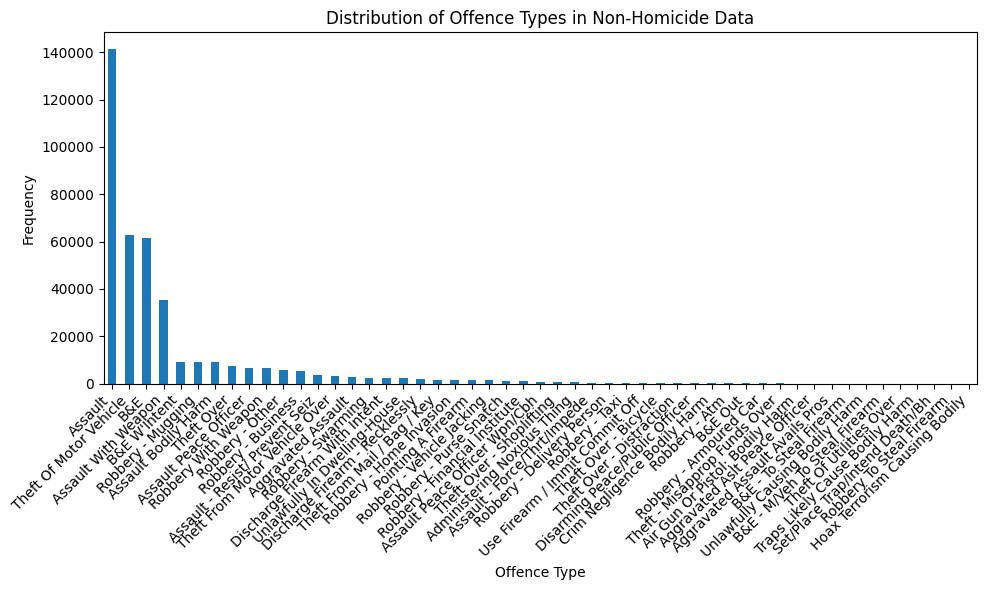

In [21]:
# Analyze the distribution of values in the 'OFFENCE' column
offence_distribution = non_homicide_data['OFFENCE'].value_counts()

# Display the distribution
print("Distribution of values in the 'OFFENCE' column:")
print(offence_distribution)

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
offence_distribution.plot(kind='bar')
plt.title('Distribution of Offence Types in Non-Homicide Data')
plt.xlabel('Offence Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Distribution of values in the 'OCC_YEAR' column:
OCC_YEAR
2023    48159
2022    40808
2019    39198
2018    36935
2017    34941
2020    34655
2021    34261
2016    33115
2015    32591
2014    31953
2024    22316
2013      602
2012      210
2011      141
2010      109
2009       81
2008       48
2005       34
2007       34
2004       31
2000       25
2006       24
2001       23
2002       20
2003       18
Name: count, dtype: int64



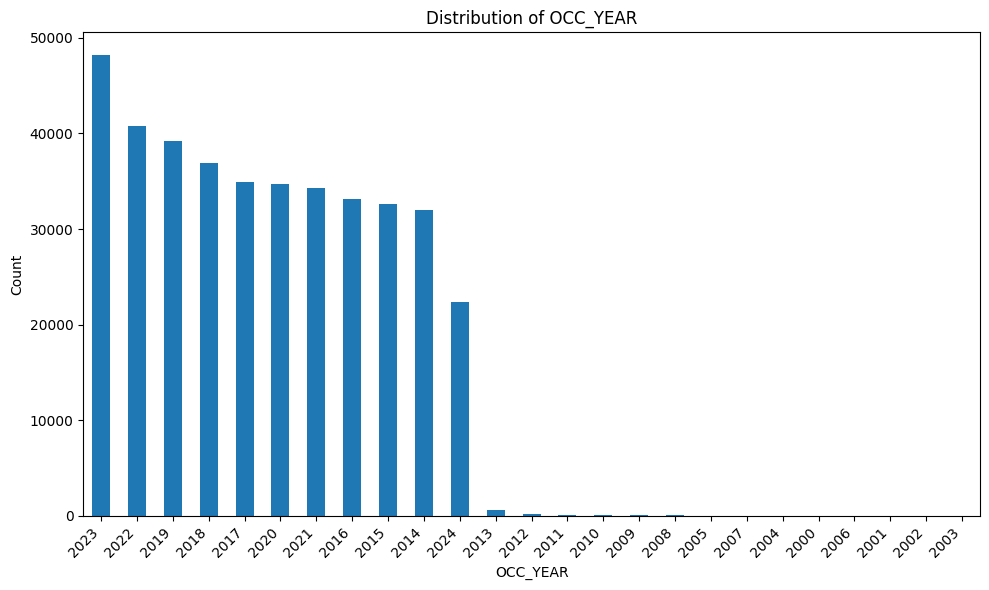

Distribution of values in the 'OCC_MONTH' column:
OCC_MONTH
May          35533
June         35217
January      33309
October      32793
March        32621
July         32511
August       32407
April        32358
September    31732
November     31728
December     30522
February     29601
Name: count, dtype: int64



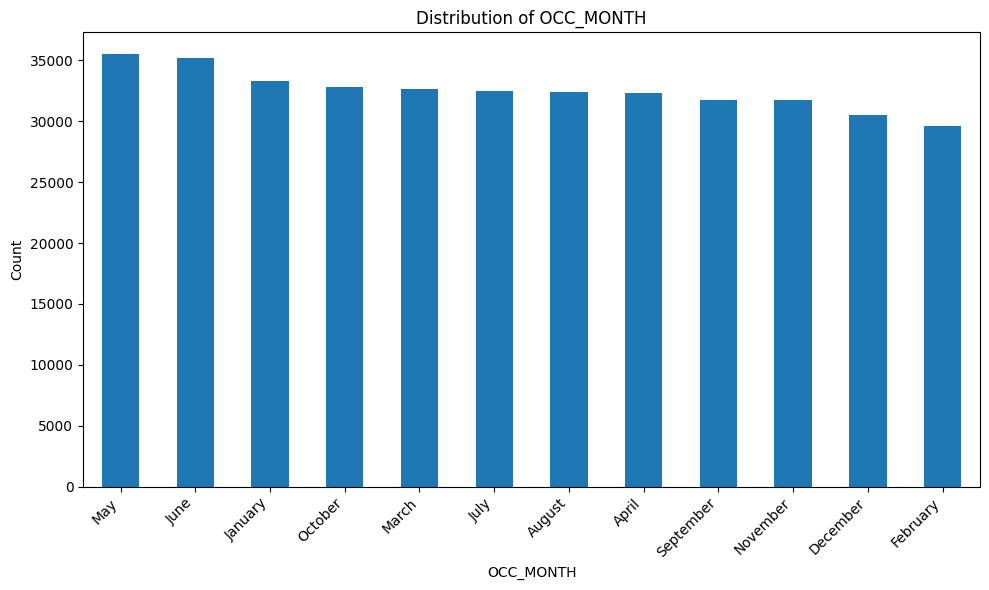

Distribution of values in the 'OCC_DAY' column:
OCC_DAY
1     20895
18    13048
20    12967
15    12899
17    12867
16    12756
24    12718
12    12698
19    12649
14    12640
21    12582
10    12581
23    12579
9     12575
11    12562
22    12513
25    12509
27    12500
28    12483
6     12457
5     12434
8     12368
3     12363
2     12336
13    12335
7     12319
26    12182
4     12115
29    11424
30    11398
31     7580
Name: count, dtype: int64



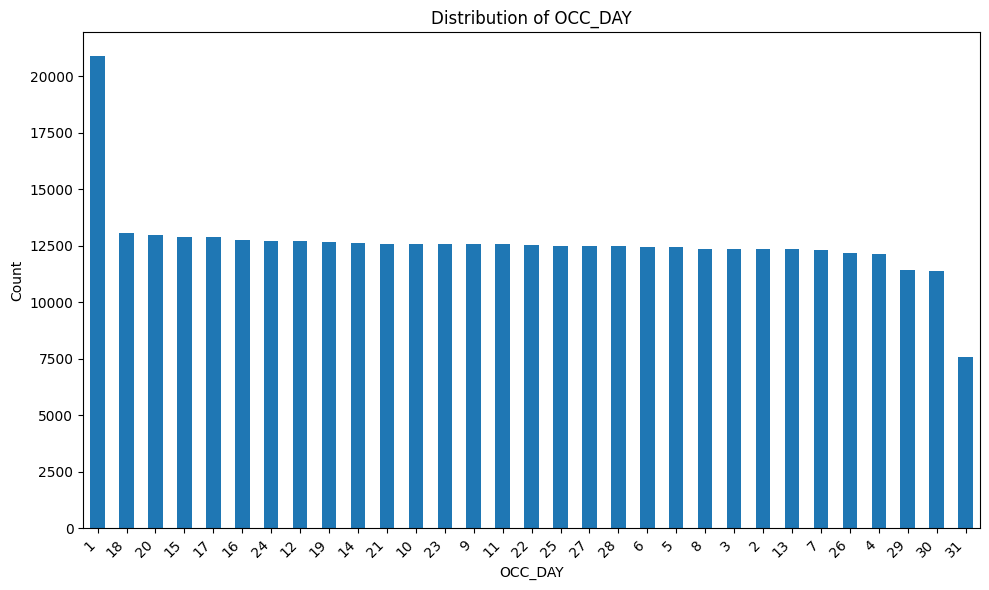

Distribution of values in the 'OCC_DOY' column:
OCC_DOY
1      3189
152    1686
182    1659
305    1617
121    1548
       ... 
364     873
362     868
361     860
360     788
366     193
Name: count, Length: 366, dtype: int64



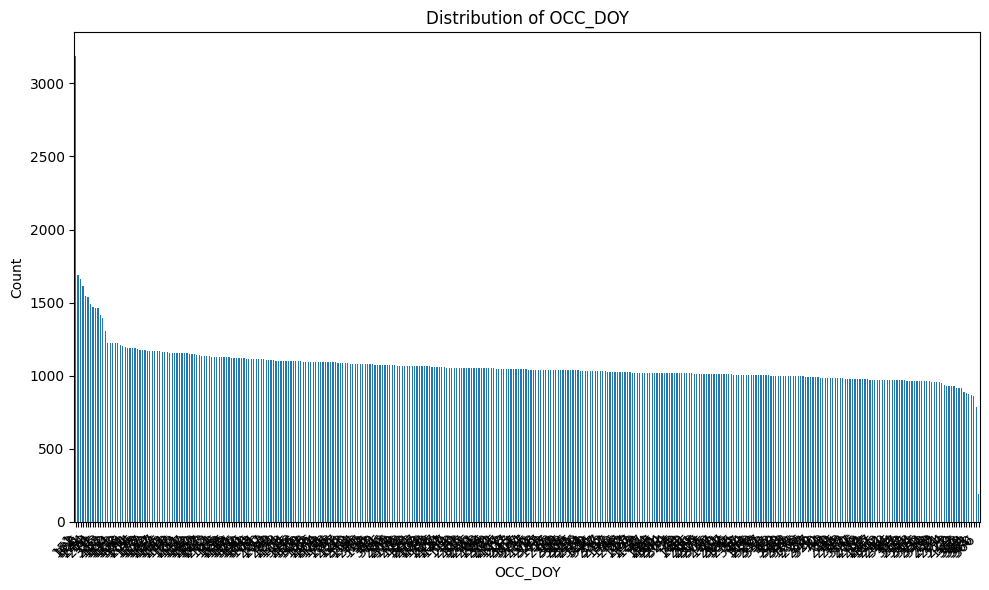

Distribution of values in the 'OCC_DOW' column:
OCC_DOW
Friday        58876
Saturday      57325
Sunday        55394
Thursday      55323
Wednesday     55146
Monday        54394
Tuesday       53874
Name: count, dtype: int64



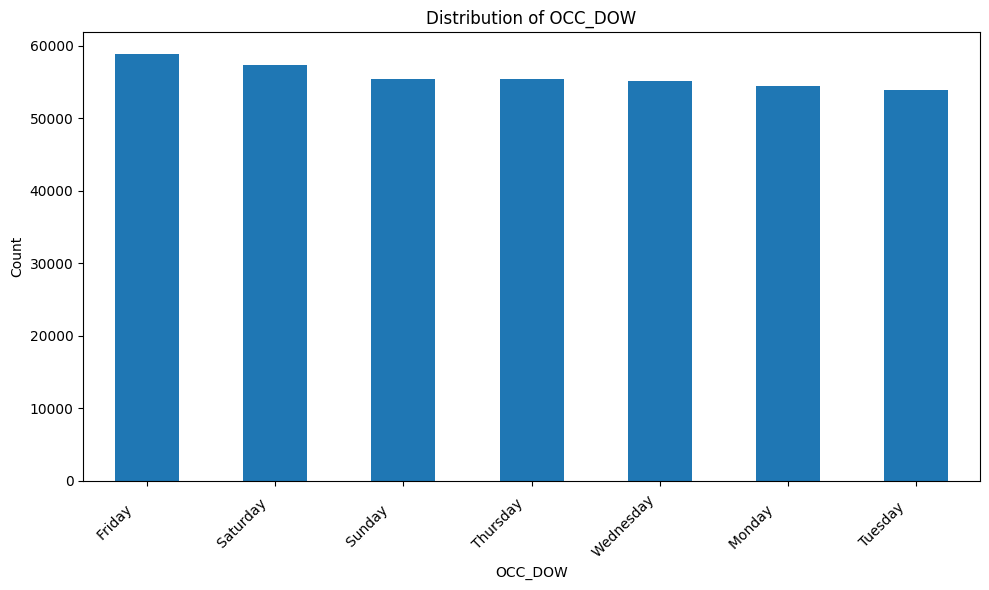

Distribution of values in the 'OCC_HOUR' column:
OCC_HOUR
0     27064
21    21303
20    21277
12    21196
18    21155
22    21062
23    20417
19    20341
17    19545
15    18817
16    18136
14    16013
1     15866
2     15789
13    14823
11    13710
3     13170
10    13011
9     12787
8     11014
4     10628
5      8142
7      8072
6      6994
Name: count, dtype: int64



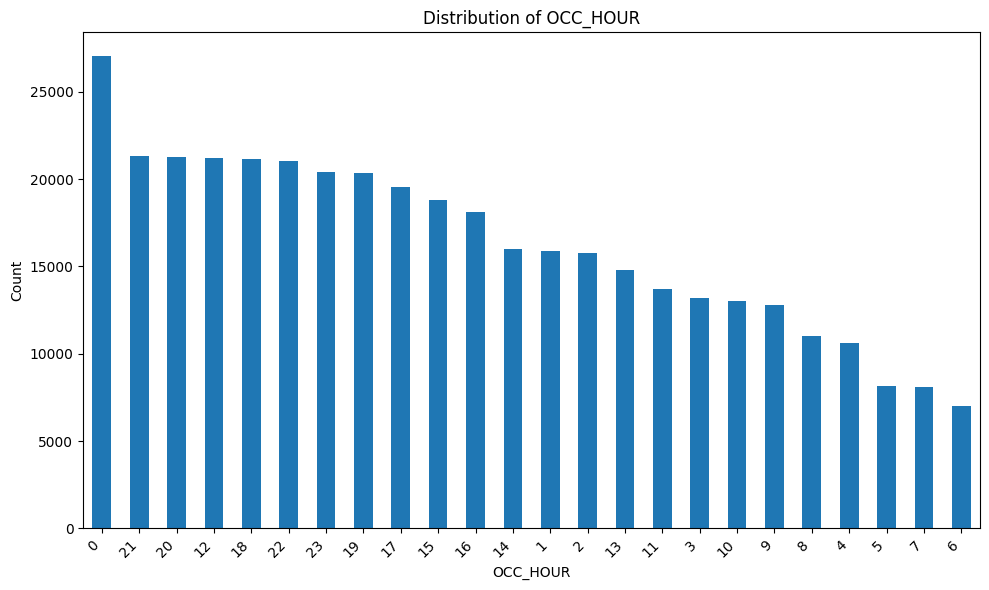

Distribution of values in the 'DIVISION' column:
DIVISION
D51    32520
D32    30994
D31    28833
D14    27482
D41    27394
D43    27376
D22    26450
D23    25504
D55    24400
D42    23867
D52    23361
D53    21106
D33    17718
D12    17067
D11    15840
D13    14112
D54     6308
Name: count, dtype: int64



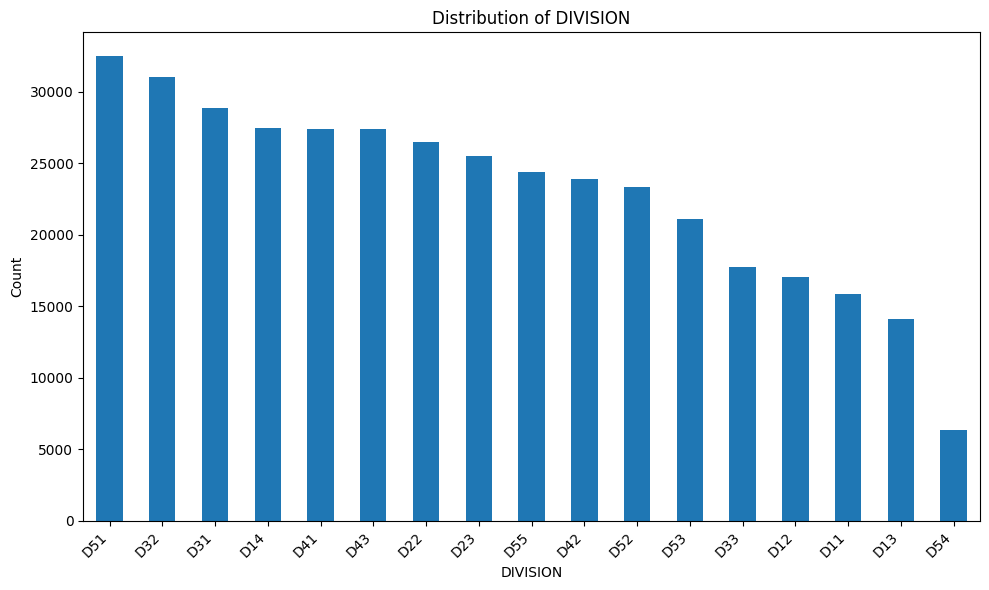

Distribution of values in the 'LOCATION_TYPE' column:
LOCATION_TYPE
Apartment (Rooming House, Condo)                                          92157
Single Home, House (Attach Garage, Cottage, Mobile)                       71259
Streets, Roads, Highways (Bicycle Path, Private Road)                     59836
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg    44915
Parking Lots (Apt., Commercial Or Non-Commercial)                         35775
Bar / Restaurant                                                          14876
Open Areas (Lakes, Parks, Rivers)                                          7601
Schools During Supervised Activity                                         5875
Ttc Subway Station                                                         5112
Convenience Stores                                                         4983
Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)          4232
Private Property Structure (Pool, Shed, Detached Gar

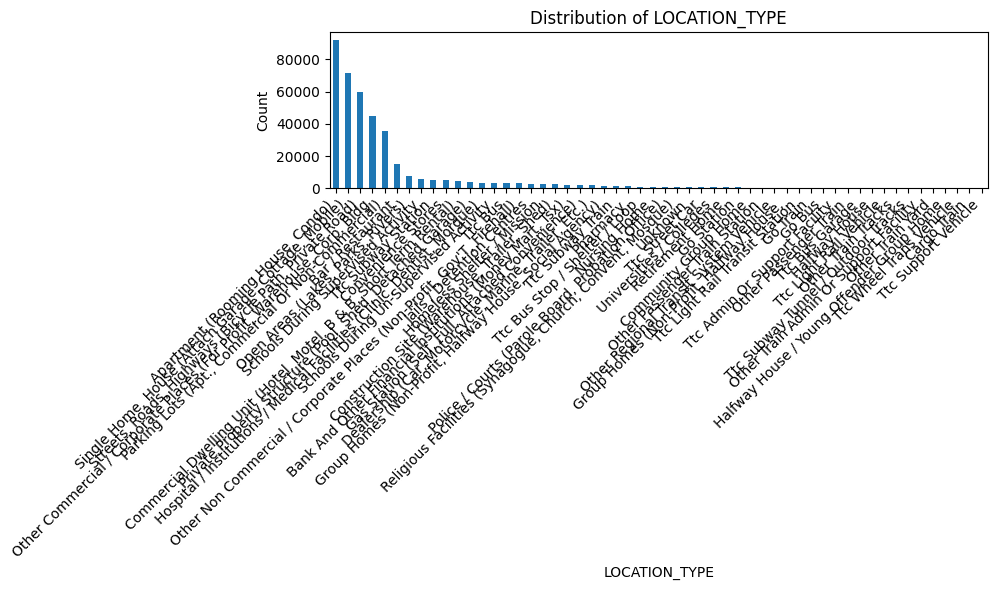

Distribution of values in the 'PREMISES_TYPE' column:
PREMISES_TYPE
Outside        104271
Apartment       92157
Commercial      77572
House           71259
Other           23425
Transit         11749
Educational      9899
Name: count, dtype: int64



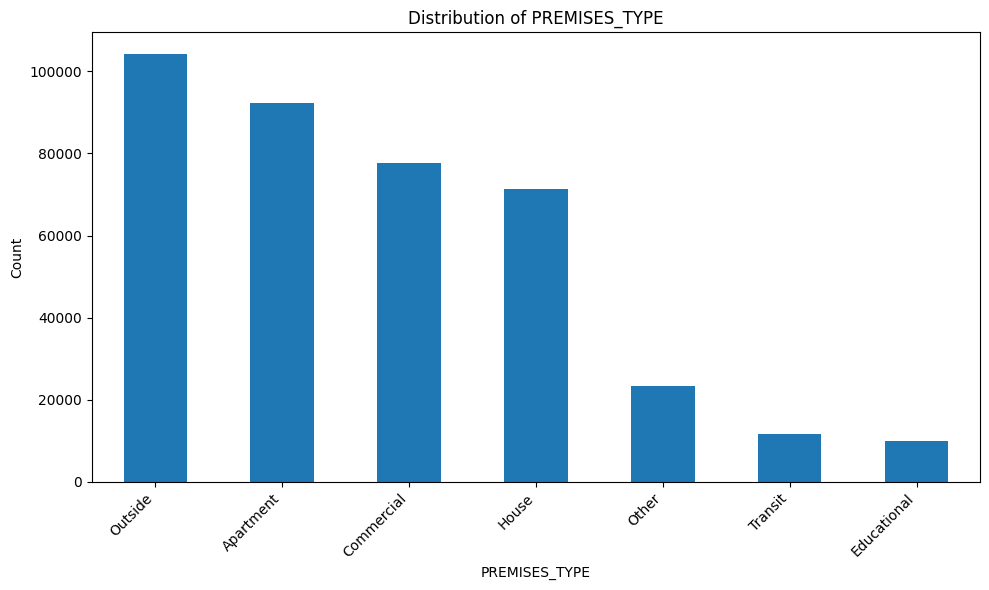

Distribution of values in the 'MCI_CATEGORY' column:
MCI_CATEGORY
Assault            206626
Break and Enter     73176
Auto Theft          62888
Robbery             34504
Theft Over          13138
Name: count, dtype: int64



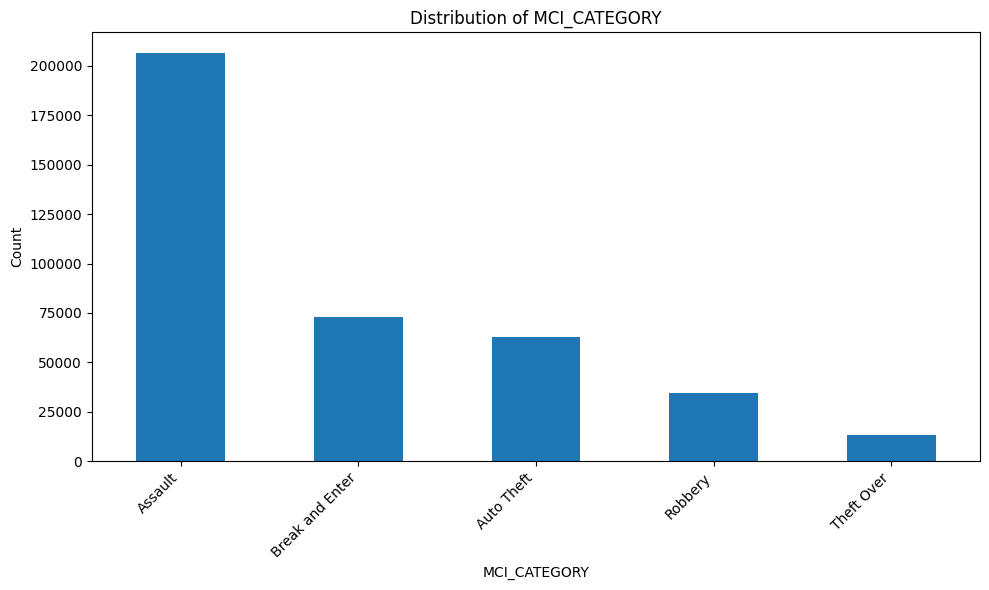

Distribution of values in the 'NEIGHBOURHOOD_158' column:
NEIGHBOURHOOD_158
West Humber-Clairville (1)      10974
Moss Park (73)                   8980
Downtown Yonge East (168)        8179
York University Heights (27)     7746
Yonge-Bay Corridor (170)         7646
                                ...  
Avondale (153)                    822
Yonge-St.Clair (97)               794
Guildwood (140)                   720
Woodbine-Lumsden (60)             686
Lambton Baby Point (114)          626
Name: count, Length: 158, dtype: int64



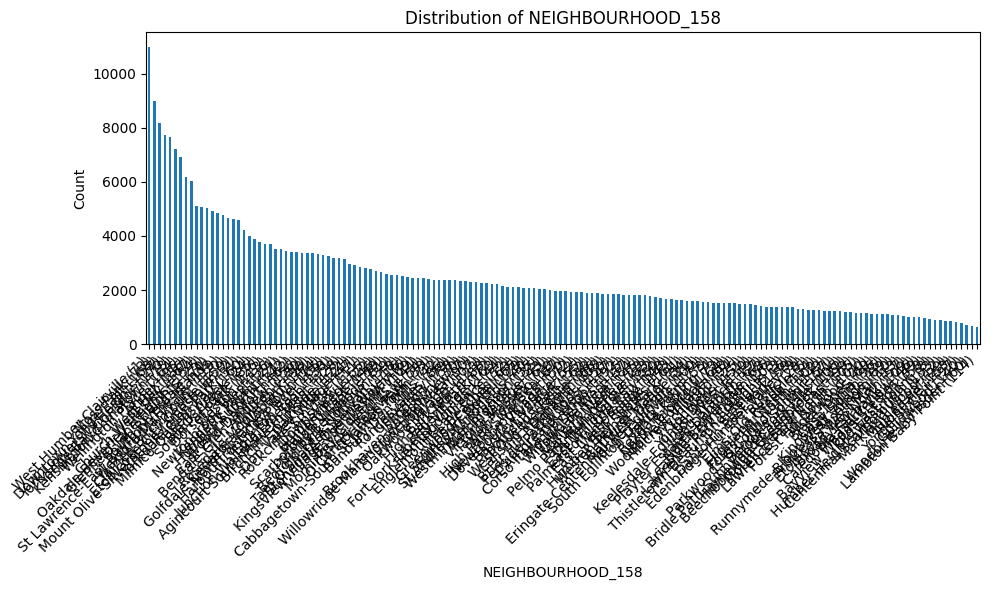

In [22]:
#Similar analysis on other columns

# List of columns for analysis
columns_to_analyze = [
    'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
    'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'MCI_CATEGORY', 'NEIGHBOURHOOD_158'
]

# Function to count values and plot for each column
for column in columns_to_analyze:
    counts = non_homicide_data[column].value_counts()

# Print value counts
    print(f"Distribution of values in the '{column}' column:\n{counts}\n")
# Plot value counts
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [23]:
# Filter out data prior to 2014
non_homicide_data = non_homicide_data[non_homicide_data['OCC_YEAR'] >= 2014]

# Verify the updated distribution
print(non_homicide_data['OCC_YEAR'].value_counts().sort_index())

OCC_YEAR
2014    31953
2015    32591
2016    33115
2017    34941
2018    36935
2019    39198
2020    34655
2021    34261
2022    40808
2023    48159
2024    22316
Name: count, dtype: int64


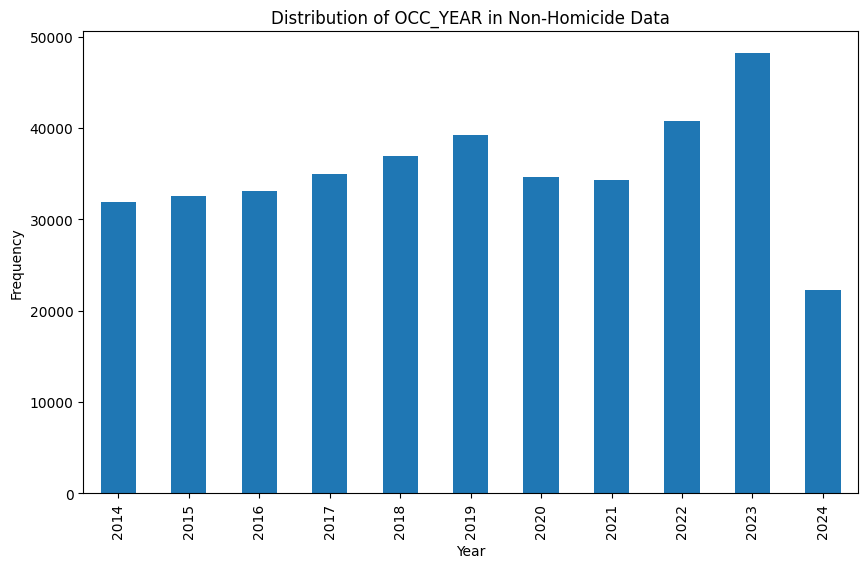

In [24]:
# plot the distribution of OCC_YEAR after removing data from 2000 to 2013
plt.figure(figsize=(10, 6))
non_homicide_data['OCC_YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of OCC_YEAR in Non-Homicide Data')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [25]:
# check the number of remaining rows after removing data from before 2014
print(non_homicide_data.shape)

(388932, 31)


In [26]:
# Prepare the Non-Homicide Data
non_homicide_prepared = non_homicide_data.copy()

# Convert categorical columns with textual data to numerical values using one-hot encoding
categorical_columns = ['OCC_DOW', 'OCC_MONTH', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'MCI_CATEGORY', 'NEIGHBOURHOOD_158']
non_homicide_prepared = pd.get_dummies(non_homicide_prepared, columns=categorical_columns, drop_first=True)

# Drop unnecessary column
columns_to_drop = ['EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR', 'UCR_CODE', 'UCR_EXT', 'NEIGHBOURHOOD_140', 'HOOD_140', 'HOOD_158', 'x', 'y']
non_homicide_prepared = non_homicide_prepared.drop(columns=columns_to_drop, axis=1)

# Standardize numerical columns for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['OCC_YEAR', 'OCC_DAY', 'OCC_DOY', 'OCC_HOUR', 'LONG_WGS84', 'LAT_WGS84']
non_homicide_prepared[numerical_columns] = scaler.fit_transform(non_homicide_prepared[numerical_columns])

# Isolate features (X) and target (y)
target_column = 'OFFENCE'
X_non_homicide = non_homicide_prepared.drop(columns=[target_column], axis=1)
y_non_homicide = non_homicide_prepared[target_column]

# Print shapes of feature matrix (X) and target vector (y) to verify
print(f"Feature matrix (X_non_homicide) shape: {X_non_homicide.shape}")
print(f"Target vector (y_non_homicide) shape: {y_non_homicide.shape}")

# Print sample data to verify correctness
print("Sample of Prepared Non-Homicide Data:")
print(non_homicide_prepared.head())

Feature matrix (X_non_homicide) shape: (388932, 260)
Target vector (y_non_homicide) shape: (388932,)
Sample of Prepared Non-Homicide Data:
   OBJECTID  OCC_YEAR   OCC_DAY   OCC_DOY  OCC_HOUR              OFFENCE  \
0         1 -1.658124 -1.623978 -1.729238 -1.317081              Assault   
2         3 -1.658124 -1.623978 -1.729238 -1.179549  Robbery With Weapon   
4         5 -1.658124 -1.623978 -1.729238 -1.454614                  B&E   
5         6 -1.658124 -1.623978 -1.729238 -0.629420                  B&E   
6         7 -1.658124 -1.623978 -1.729238 -0.491888         B&E W'Intent   

   LONG_WGS84  LAT_WGS84  OCC_DOW_Monday      OCC_DOW_Saturday    ...  \
0   -0.556791  -0.548120               False               False  ...   
2   -0.036254  -1.120737               False               False  ...   
4   -0.140917  -1.057547               False               False  ...   
5   -0.226708   1.625596               False               False  ...   
6   -0.383822  -1.258442               

In [27]:
#Some offences that occured less than 100 times are merged under Offence - Other, a new category to account for lowest frequency occurences
# Count occurrences of each offence
offence_counts = y_non_homicide.value_counts()

# Identify offences with fewer than 100 occurrences
rare_offences = offence_counts[offence_counts < 100].index

# Replace rare offences with "Offence - Other"
y_non_homicide = y_non_homicide.replace(rare_offences, 'Offence - Other')

# Verify the updated distribution
print("Updated Distribution of 'OFFENCE':")
print(y_non_homicide.value_counts())

Updated Distribution of 'OFFENCE':
OFFENCE
Assault                           140587
Theft Of Motor Vehicle             62839
B&E                                61428
Assault With Weapon                35183
B&E W'Intent                        9180
Robbery - Mugging                   9031
Assault Bodily Harm                 8859
Theft Over                          7246
Assault Peace Officer               6550
Robbery With Weapon                 6407
Robbery - Other                     5778
Robbery - Business                  5160
Assault - Resist/ Prevent Seiz      3514
Theft From Motor Vehicle Over       3220
Aggravated Assault                  2921
Robbery - Swarming                  2554
Discharge Firearm With Intent       2391
Unlawfully In Dwelling-House        2331
Discharge Firearm - Recklessly      1729
Theft From Mail / Bag / Key         1501
Robbery - Home Invasion             1408
Pointing A Firearm                  1383
Robbery - Vehicle Jacking           1344
Robbery - Purs

In [28]:
pip install folium

In [29]:


import folium
from folium.plugins import MarkerCluster



# Initialize the map centered on Toronto
crime_map = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Add markers for each crime location using a marker cluster
marker_cluster = MarkerCluster().add_to(crime_map)

for _, row in non_homicide_data.iterrows():
    folium.Marker(
        location=[row['LAT_WGS84'], row['LONG_WGS84']],
        popup=f"Offense: {row['OFFENCE']}<br>Neighbourhood: {row['NEIGHBOURHOOD_158']}",
    ).add_to(marker_cluster)

# Display the map

crime_map.save("Toronto_crime_map.html")

from google.colab import files

# Download the map to your local machine
files.download('toronto_crime_map.html')



FileNotFoundError: Cannot find file: toronto_crime_map.html

In [175]:
from sklearn.model_selection import train_test_split

# Splitting the data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_non_homicide, y_non_homicide, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 311145
Test set size: 77787


In [178]:
# Analyze class distribution in the training set
print("Class distribution in y_train:")
print(y_train.value_counts())

Class distribution in y_train:
OFFENCE
Assault                           112680
Theft Of Motor Vehicle             50126
B&E                                49229
Assault With Weapon                27965
Robbery - Mugging                   7363
B&E W'Intent                        7309
Assault Bodily Harm                 7079
Theft Over                          5841
Assault Peace Officer               5182
Robbery With Weapon                 5114
Robbery - Other                     4623
Robbery - Business                  4169
Assault - Resist/ Prevent Seiz      2795
Theft From Motor Vehicle Over       2567
Aggravated Assault                  2327
Robbery - Swarming                  2045
Discharge Firearm With Intent       1889
Unlawfully In Dwelling-House        1862
Discharge Firearm - Recklessly      1396
Theft From Mail / Bag / Key         1218
Robbery - Home Invasion             1129
Pointing A Firearm                  1093
Robbery - Vehicle Jacking           1086
Robbery - Purse Sn

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Step 1: Logistic Regression")

# Initialize and fit Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("\nAccuracy Score for Logistic Regression:")
print(accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

Step 1: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                precision    recall  f1-score   support

   Administering Noxious Thing       0.00      0.00      0.00       135
            Aggravated Assault       0.00      0.00      0.00       594
                       Assault       0.47      0.95      0.63     27907
   Assault - Force/Thrt/Impede       0.00      0.00      0.00        92
Assault - Resist/ Prevent Seiz       0.00      0.00      0.00       719
           Assault Bodily Harm       0.00      0.00      0.00      1780
         Assault Peace Officer       0.00      0.00      0.00      1368
 Assault Peace Officer Wpn/Cbh       0.00      0.00      0.00       156
           Assault With Weapon       0.00      0.00      0.00      7218
                           B&E       0.83      0.64      0.72     12199
                       B&E Out       0.00      0.00      0.00        27
                  B&E W'Intent       0.00      0.00      0.00      1871
   Crim Negligence Bodily Harm       0.00      0.00      0.00  

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("\nStep 2: Decision Tree Classifier")

# Initialize and fit Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score for Decision Tree Classifier:")
print(accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_test, y_pred_dt))



Step 2: Decision Tree Classifier

Classification Report for Decision Tree Classifier:
                                precision    recall  f1-score   support

   Administering Noxious Thing       0.09      0.10      0.09       135
            Aggravated Assault       0.14      0.16      0.15       594
                       Assault       0.74      0.71      0.73     27907
   Assault - Force/Thrt/Impede       0.16      0.16      0.16        92
Assault - Resist/ Prevent Seiz       0.26      0.30      0.28       719
           Assault Bodily Harm       0.12      0.14      0.13      1780
         Assault Peace Officer       0.32      0.35      0.34      1368
 Assault Peace Officer Wpn/Cbh       0.35      0.42      0.38       156
           Assault With Weapon       0.26      0.29      0.27      7218
                           B&E       0.85      0.83      0.84     12199
                       B&E Out       0.05      0.04      0.04        27
                  B&E W'Intent       0.17      0

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("\nStep 3: Random Forest Classifier")

# Initialize and fit Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score for Random Forest Classifier:")
print(accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))



Step 3: Random Forest Classifier

Classification Report for Random Forest Classifier:
                                precision    recall  f1-score   support

   Administering Noxious Thing       0.24      0.10      0.14       135
            Aggravated Assault       0.29      0.15      0.20       594
                       Assault       0.74      0.93      0.83     27907
   Assault - Force/Thrt/Impede       0.38      0.16      0.23        92
Assault - Resist/ Prevent Seiz       0.51      0.25      0.33       719
           Assault Bodily Harm       0.25      0.11      0.15      1780
         Assault Peace Officer       0.59      0.34      0.43      1368
 Assault Peace Officer Wpn/Cbh       0.59      0.42      0.49       156
           Assault With Weapon       0.42      0.18      0.25      7218
                           B&E       0.84      0.99      0.91     12199
                       B&E Out       0.00      0.00      0.00        27
                  B&E W'Intent       0.48      0

HOMICIDE ANALYSIS

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns



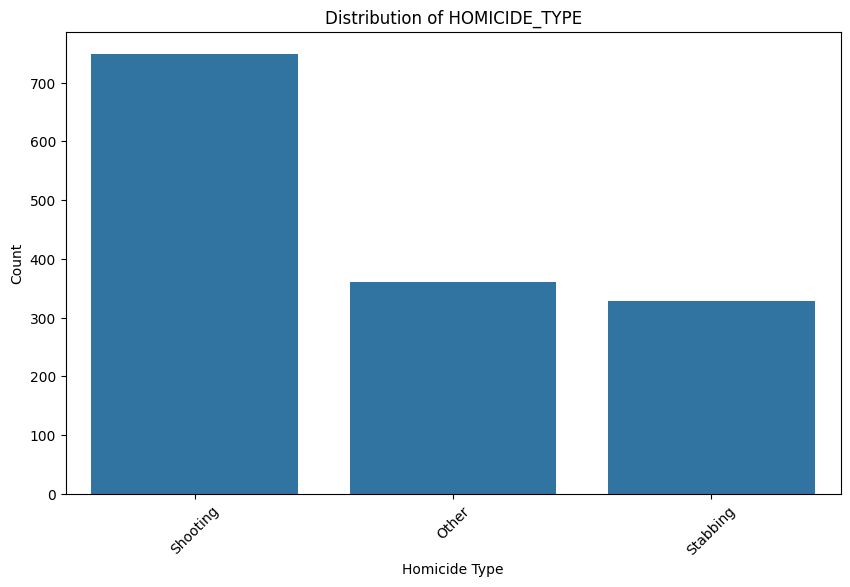

In [180]:
# Plot Distribution of HOMICIDE_TYPE
plt.figure(figsize=(10, 6))
sns.countplot(data=homicide_data, x='HOMICIDE_TYPE', order=homicide_data['HOMICIDE_TYPE'].value_counts().index)
plt.title("Distribution of HOMICIDE_TYPE")
plt.xlabel("Homicide Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


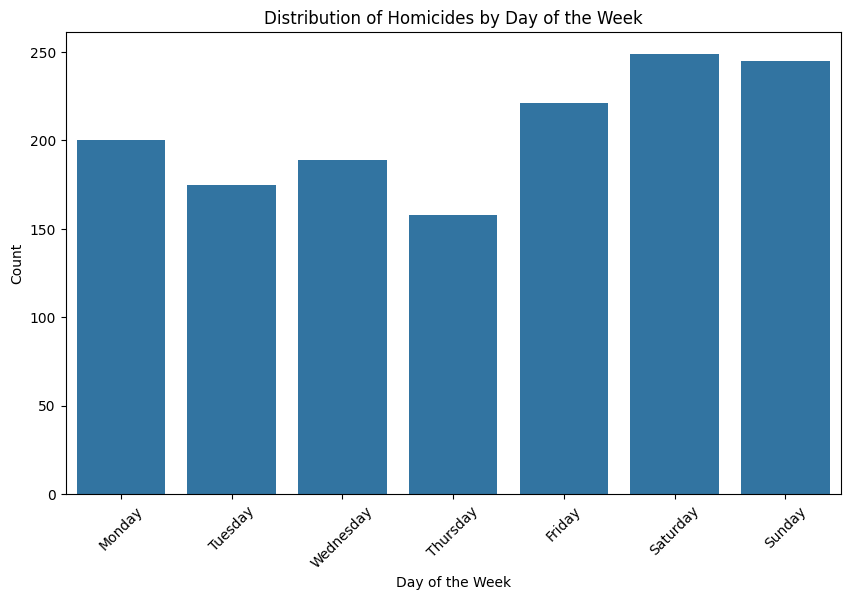

In [181]:
# Plot Distribution of OCC_DOW
plt.figure(figsize=(10, 6))
sns.countplot(data=homicide_data, x='OCC_DOW', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Distribution of Homicides by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


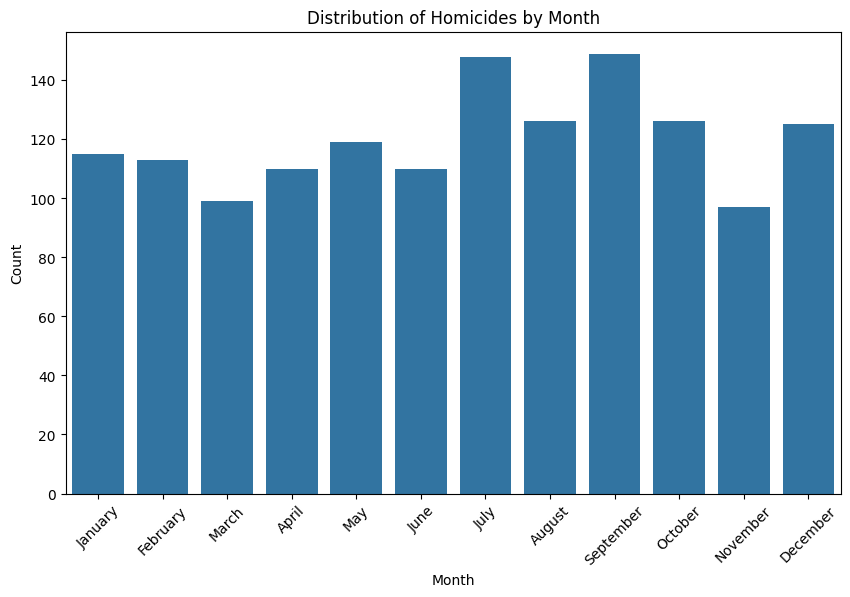

In [182]:
# Plot Distribution of OCC_MONTH
plt.figure(figsize=(10, 6))
sns.countplot(data=homicide_data, x='OCC_MONTH', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title("Distribution of Homicides by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


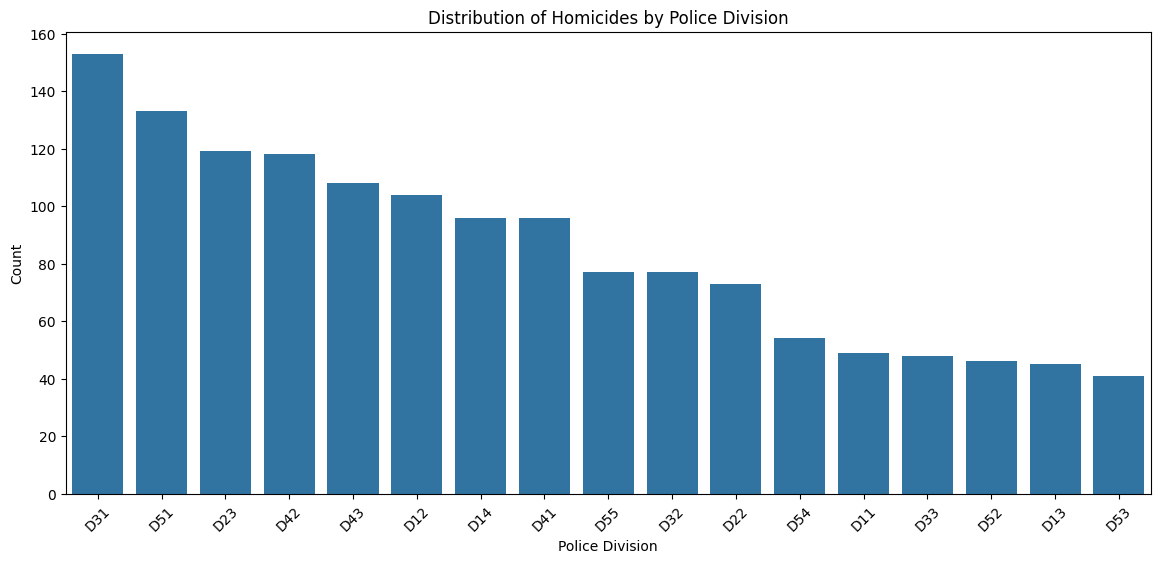

In [183]:
# Plot Distribution of Police Division
plt.figure(figsize=(14, 6))
sns.countplot(data=homicide_data, x='DIVISION', order=homicide_data['DIVISION'].value_counts().index)
plt.title("Distribution of Homicides by Police Division")
plt.xlabel("Police Division")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [191]:
import folium

# Initialize a map centered at the average coordinates of Toronto
map_homicides = folium.Map(location=[homicide_data['LAT_WGS84'].mean(), homicide_data['LONG_WGS84'].mean()], zoom_start=10)

# Define a color dictionary for the three homicide types
color_dict = {
    'Shooting': 'red',
    'Stabbing': 'orange',
    'Other': 'yellow'
}

# Add markers to the map for each homicide, colored by type
for _, row in homicide_data.iterrows():
    homicide_type = row['HOMICIDE_TYPE']
    folium.CircleMarker(
        location=[row['LAT_WGS84'], row['LONG_WGS84']],
        radius=2,
        color=color_dict[homicide_type],
        fill=True,
        fill_opacity=0.7,
        tooltip=f"Homicide Type: {homicide_type}, Division: {row['DIVISION']}, Date: {row['OCC_DATE']}"
    ).add_to(map_homicides)

# Add a layer control to make the map more interactive
folium.LayerControl().add_to(map_homicides)

# Display the map
map_homicides


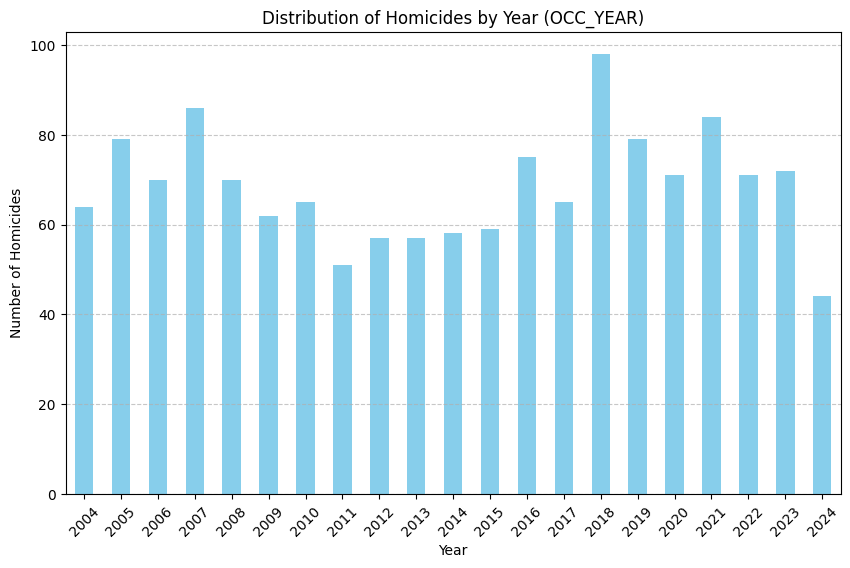

In [193]:
# Plot the distribution of OCC_YEAR
plt.figure(figsize=(10, 6))
homicide_data['OCC_YEAR'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.title('Distribution of Homicides by Year (OCC_YEAR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

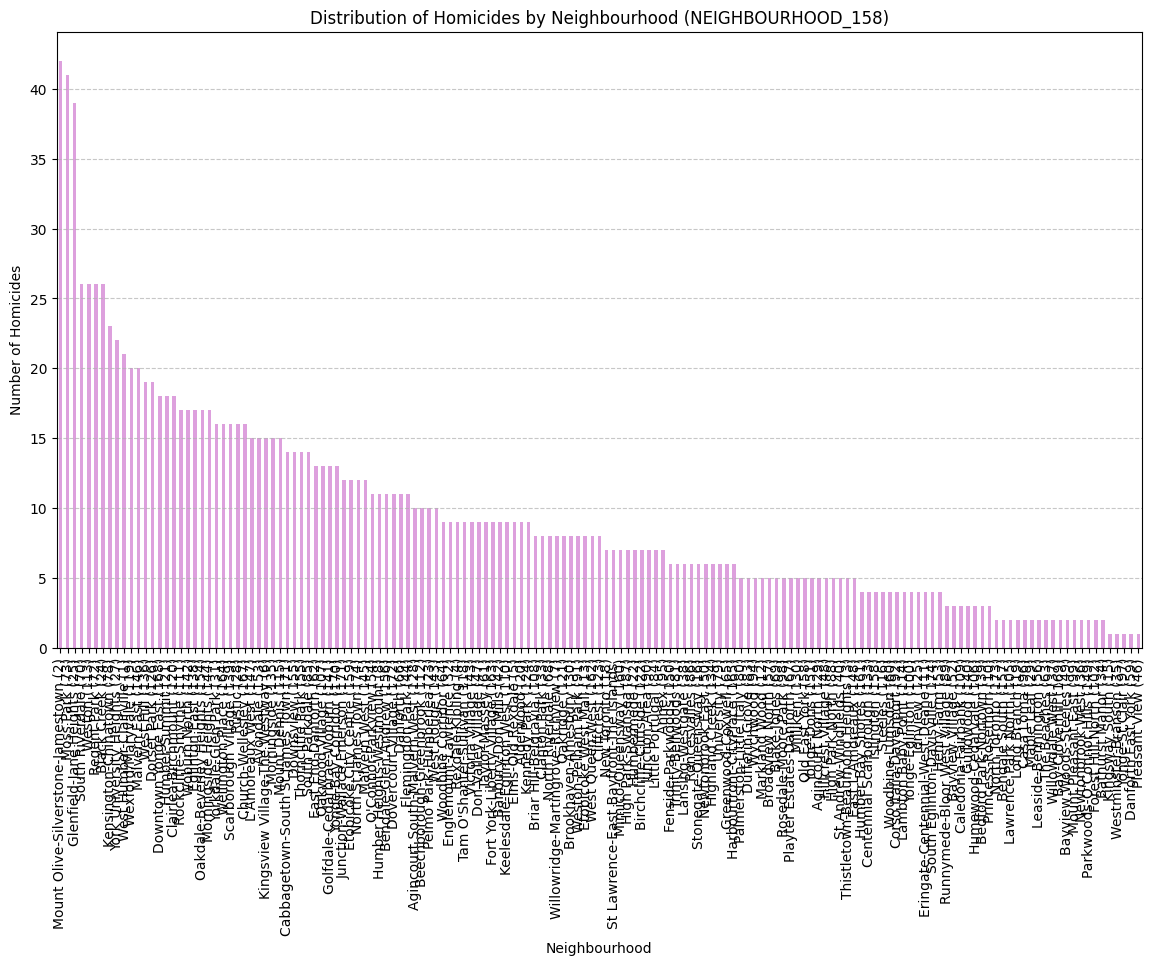

In [196]:
# Plot the distribution of NEIGHBOURHOOD_158
plt.figure(figsize=(14, 8))
homicide_data['NEIGHBOURHOOD_158'].value_counts().plot(kind='bar', color='plum')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Homicides')
plt.title('Distribution of Homicides by Neighbourhood (NEIGHBOURHOOD_158)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [209]:
# Create a copy of the homicide data for processing
homicide_prepared = homicide_data.copy()

# Drop irrelevant columns, including OCC_DATE and HOOD_158
columns_to_drop = ['OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'HOOD_140', 'NEIGHBOURHOOD_140', 'x', 'y', 'HOOD_158']
homicide_prepared = homicide_prepared.drop(columns=columns_to_drop, axis=1)

# Display the updated dataframe
print("Updated Homicide DataFrame:")
print(homicide_prepared.head())

# Check the columns retained
print("Retained Columns:")
print(homicide_prepared.columns)


Updated Homicide DataFrame:
   OCC_YEAR OCC_MONTH  OCC_DAY   OCC_DOW  OCC_DOY DIVISION HOMICIDE_TYPE  \
0      2004   January        3  Saturday        3      D53         Other   
1      2004   January        8  Thursday        8      D42      Shooting   
2      2004   January        8  Thursday        8      D42      Shooting   
3      2004   January       25    Sunday       25      D13      Shooting   
4      2004   January       25    Sunday       25      D42      Shooting   

                NEIGHBOURHOOD_158  LONG_WGS84  LAT_WGS84  
0        Rosedale-Moore Park (98)  -79.392828  43.685026  
1              Woburn North (142)  -79.233852  43.781782  
2              Malvern East (146)  -79.205574  43.810544  
3  Junction-Wallace Emerson (171)  -79.434387  43.670467  
4       Morningside Heights (144)  -79.204958  43.822997  
Retained Columns:
Index(['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOW', 'OCC_DOY', 'DIVISION',
       'HOMICIDE_TYPE', 'NEIGHBOURHOOD_158', 'LONG_WGS84', 'LAT_WG

In [206]:
# check the number of rows
print(homicide_prepared.shape)

(1437, 10)


In [210]:
# Convert categorical columns with textual data to numerical values using one-hot encoding
categorical_columns = ['OCC_MONTH', 'OCC_DOW', 'DIVISION', 'NEIGHBOURHOOD_158']
homicide_prepared = pd.get_dummies(homicide_prepared, columns=categorical_columns, drop_first=True)

# Print sample data to verify correctness
print("Sample of Prepared Homicide Data:")
print(homicide_prepared.head())

Sample of Prepared Homicide Data:
   OCC_YEAR  OCC_DAY  OCC_DOY HOMICIDE_TYPE  LONG_WGS84  LAT_WGS84  \
0      2004        3        3         Other  -79.392828  43.685026   
1      2004        8        8      Shooting  -79.233852  43.781782   
2      2004        8        8      Shooting  -79.205574  43.810544   
3      2004       25       25      Shooting  -79.434387  43.670467   
4      2004       25       25      Shooting  -79.204958  43.822997   

   OCC_MONTH_August  OCC_MONTH_December  OCC_MONTH_February  \
0             False               False               False   
1             False               False               False   
2             False               False               False   
3             False               False               False   
4             False               False               False   

   OCC_MONTH_January  ...  NEIGHBOURHOOD_158_Woburn North (142)  \
0               True  ...                                 False   
1               True  ...       

In [213]:
from sklearn.preprocessing import StandardScaler

# Define the numerical columns to standardize
numerical_columns = ['OCC_YEAR', 'OCC_DAY', 'OCC_DOY', 'LONG_WGS84', 'LAT_WGS84']

# Standardize numerical columns
scaler = StandardScaler()
homicide_prepared[numerical_columns] = scaler.fit_transform(homicide_prepared[numerical_columns])

# Print sample data to verify correctness
print("\nSample of Standardized Homicide Data:")
print(homicide_prepared.head())


Sample of Standardized Homicide Data:
   OCC_YEAR   OCC_DAY   OCC_DOY HOMICIDE_TYPE  LONG_WGS84  LAT_WGS84  \
0 -1.646144 -1.442599 -1.778006         Other    0.055668  -0.510933   
1 -1.646144 -0.873277 -1.729614      Shooting    1.476244   1.367069   
2 -1.646144 -0.873277 -1.729614      Shooting    1.728928   1.925344   
3 -1.646144  1.062418 -1.565082      Shooting   -0.315693  -0.793529   
4 -1.646144  1.062418 -1.565082      Shooting    1.734433   2.167042   

   OCC_MONTH_August  OCC_MONTH_December  OCC_MONTH_February  \
0             False               False               False   
1             False               False               False   
2             False               False               False   
3             False               False               False   
4             False               False               False   

   OCC_MONTH_January  ...  NEIGHBOURHOOD_158_Woburn North (142)  \
0               True  ...                                 False   
1              

In [212]:
# Isolate features (X) and target (y)
target_column = 'HOMICIDE_TYPE'
X_homicide = homicide_prepared.drop(columns=[target_column], axis=1)
y_homicide = homicide_prepared[target_column]

# Print shapes of feature matrix (X) and target vector (y) to verify
print(f"\nFeature matrix (X_homicide) shape: {X_homicide.shape}")
print(f"Target vector (y_homicide) shape: {y_homicide.shape}")

# Print sample data to verify correctness
print("\nSample of Prepared Features and Target for Homicide Data:")
print(X_homicide.head())
print(y_homicide.head())


Feature matrix (X_homicide) shape: (1437, 190)
Target vector (y_homicide) shape: (1437,)

Sample of Prepared Features and Target for Homicide Data:
   OCC_YEAR   OCC_DAY   OCC_DOY  LONG_WGS84  LAT_WGS84  OCC_MONTH_August  \
0 -1.646144 -1.442599 -1.778006    0.055668  -0.510933             False   
1 -1.646144 -0.873277 -1.729614    1.476244   1.367069             False   
2 -1.646144 -0.873277 -1.729614    1.728928   1.925344             False   
3 -1.646144  1.062418 -1.565082   -0.315693  -0.793529             False   
4 -1.646144  1.062418 -1.565082    1.734433   2.167042             False   

   OCC_MONTH_December  OCC_MONTH_February  OCC_MONTH_January  OCC_MONTH_July  \
0               False               False               True           False   
1               False               False               True           False   
2               False               False               True           False   
3               False               False               True           Fal

In [214]:
from sklearn.model_selection import train_test_split

# Splitting the data into Train and Test Sets
X_train_homicide, X_test_homicide, y_train_homicide, y_test_homicide = train_test_split(X_homicide, y_homicide, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train_homicide.shape[0]}")
print(f"Test set size: {X_test_homicide.shape[0]}")


Training set size: 1149
Test set size: 288


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
lr_model.fit(X_train_homicide, y_train_homicide)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_homicide)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_homicide, y_pred_lr))

print("\nAccuracy Score:")
print(accuracy_score(y_test_homicide, y_pred_lr))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_homicide, y_pred_lr))



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       Other       0.29      0.20      0.24        69
    Shooting       0.57      0.75      0.65       155
    Stabbing       0.32      0.19      0.24        64

    accuracy                           0.49       288
   macro avg       0.39      0.38      0.37       288
weighted avg       0.45      0.49      0.46       288


Accuracy Score:
0.4930555555555556

Confusion Matrix:
[[ 14  46   9]
 [ 23 116  16]
 [ 12  40  12]]


In [216]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train_homicide, y_train_homicide)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_homicide)

# Evaluate the model
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test_homicide, y_pred_dt))

print("\nAccuracy Score:")
print(accuracy_score(y_test_homicide, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_homicide, y_pred_dt))



Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

       Other       0.33      0.35      0.34        69
    Shooting       0.62      0.62      0.62       155
    Stabbing       0.34      0.33      0.33        64

    accuracy                           0.49       288
   macro avg       0.43      0.43      0.43       288
weighted avg       0.49      0.49      0.49       288


Accuracy Score:
0.4895833333333333

Confusion Matrix:
[[24 31 14]
 [32 96 27]
 [16 27 21]]


In [217]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_homicide, y_train_homicide)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_homicide)

# Evaluate the model
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test_homicide, y_pred_rf))

print("\nAccuracy Score:")
print(accuracy_score(y_test_homicide, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_homicide, y_pred_rf))



Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

       Other       0.42      0.23      0.30        69
    Shooting       0.59      0.85      0.69       155
    Stabbing       0.44      0.19      0.26        64

    accuracy                           0.55       288
   macro avg       0.48      0.42      0.42       288
weighted avg       0.52      0.55      0.50       288


Accuracy Score:
0.5520833333333334

Confusion Matrix:
[[ 16  50   3]
 [ 12 131  12]
 [ 10  42  12]]
